In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Documents/heart_fail.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
df.info

<bound method DataFrame.info of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_

In [11]:
df.shape

(299, 13)

In [12]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [13]:
# Rename death_event colounmn to class for prediction pracitices
df.rename(columns={'DEATH_EVENT': 'class'}, inplace = True)

In [14]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'class'],
      dtype='object')

In [15]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,class
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## So far
+ Due to no missing value and the data conveniently already being in integers...
+ It is evident this data set has been cleaned before I have accessed it

In [18]:
corr = df.corr()

In [48]:
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,class
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


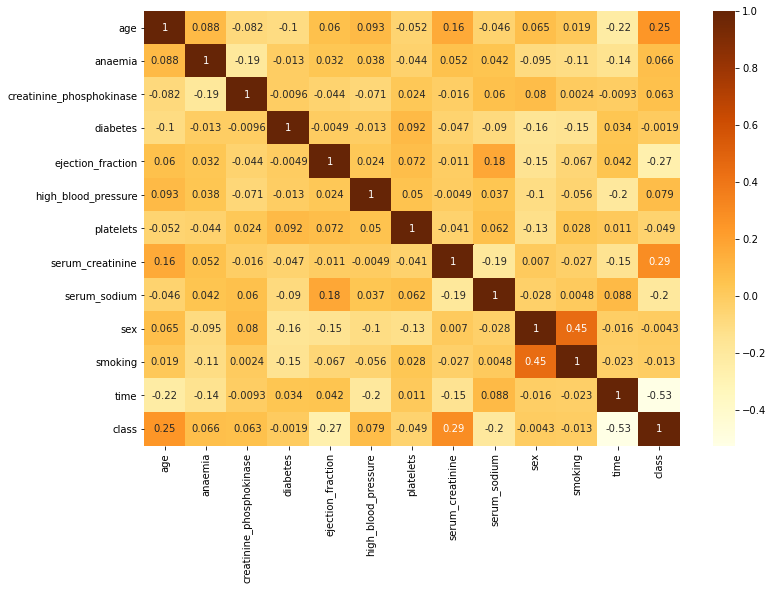

In [47]:
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True, cbar = True, cmap = 'YlOrBr')
plt.show()

## Correlation
+ Sex and Smoking correlates together
+ Time and death has the strongest negative correlation
+ Age and Serum_creatinine have a somewhat postiitve correlation with death
- Let's see if this will appear again at the end of the model's result

In [49]:
df['class'].value_counts()

0    203
1     96
Name: class, dtype: int64

###  Death = 1 Lived = 0

<AxesSubplot:>

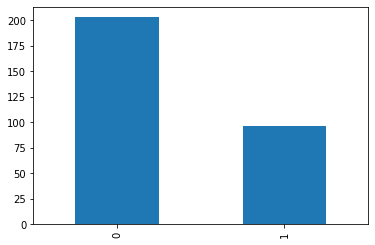

In [51]:
df['class'].value_counts().plot(kind = 'bar')

## Testing PyCaret for Machine Learning

In [54]:
import pycaret.classification as pc

In [55]:
dir(pc)

['Any',
 'Dict',
 'Display',
 'List',
 'MLUsecase',
 'Optional',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_metric',
 'automl',
 'blend_models',
 'calibrate_model',
 'compare_models',
 'create_model',
 'deploy_model',
 'enable_colab',
 'ensemble_model',
 'evaluate_model',
 'finalize_model',
 'get_config',
 'get_logs',
 'get_metrics',
 'interpret_model',
 'io',
 'is_in_colab',
 'load_config',
 'load_model',
 'models',
 'np',
 'optimize_threshold',
 'pd',
 'plot_model',
 'predict_model',
 'pull',
 'pycaret',
 'remove_metric',
 'save_config',
 'save_model',
 'set_config',
 'setup',
 'stack_models',
 'traceback',
 'tune_model',
 'warnings']

In [56]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [60]:
# Removing age and diabetes as they are obvious attributes, perhaps we can find something new
cld = pc.setup(data = df, target = 'class', ignore_features = ['age', 'diabetes'])

,Description,Value
0,session_id,1361
1,Target,class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(299, 13)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [61]:
pc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8469,0.8853,0.6857,0.8129,0.7354,0.6325,0.6412,1.1220
xgboost,Extreme Gradient Boosting,0.8421,0.8645,0.7143,0.7819,0.7323,0.6251,0.6357,0.0700
ridge,Ridge Classifier,0.8376,0.0000,0.7143,0.7778,0.7380,0.6224,0.6286,0.0070
rf,Random Forest Classifier,0.8326,0.9084,0.6429,0.8048,0.7047,0.5941,0.6066,0.0820
lda,Linear Discriminant Analysis,0.8279,0.8779,0.7000,0.7587,0.7215,0.5991,0.6051,0.0060
lr,Logistic Regression,0.8224,0.8307,0.6571,0.7674,0.6934,0.5751,0.5880,0.0100
lightgbm,Light Gradient Boosting Machine,0.8181,0.8577,0.6429,0.7708,0.6933,0.5678,0.5780,0.0230
et,Extra Trees Classifier,0.8088,0.8504,0.5571,0.7924,0.6413,0.5237,0.5436,0.0590
gbc,Gradient Boosting Classifier,0.8086,0.8640,0.6286,0.7412,0.6697,0.5417,0.5504,0.0240
ada,Ada Boost Classifier,0.7850,0.8203,0.5857,0.7092,0.6187,0.4804,0.4975,0.0280


## So you're telling me pycaret can compare diffrent models for you before even modelling? Holy...

## If compare models with all attirubtes then Randon Forest, but if get rid of age and diabetes then catboost is result

In [63]:
pc.compare_models(exclude = ['svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8469,0.8853,0.6857,0.8129,0.7354,0.6325,0.6412,2.3910
xgboost,Extreme Gradient Boosting,0.8421,0.8645,0.7143,0.7819,0.7323,0.6251,0.6357,0.2640
ridge,Ridge Classifier,0.8376,0.0000,0.7143,0.7778,0.7380,0.6224,0.6286,0.0070
rf,Random Forest Classifier,0.8326,0.9084,0.6429,0.8048,0.7047,0.5941,0.6066,0.0760
lda,Linear Discriminant Analysis,0.8279,0.8779,0.7000,0.7587,0.7215,0.5991,0.6051,0.0060
lr,Logistic Regression,0.8224,0.8307,0.6571,0.7674,0.6934,0.5751,0.5880,0.0100
lightgbm,Light Gradient Boosting Machine,0.8181,0.8577,0.6429,0.7708,0.6933,0.5678,0.5780,0.0510
et,Extra Trees Classifier,0.8088,0.8504,0.5571,0.7924,0.6413,0.5237,0.5436,0.3140
gbc,Gradient Boosting Classifier,0.8086,0.8640,0.6286,0.7412,0.6697,0.5417,0.5504,0.0250
ada,Ada Boost Classifier,0.7850,0.8203,0.5857,0.7092,0.6187,0.4804,0.4975,0.0270


In [65]:
catboost = pc.create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.8673,0.2857,0.6667,0.4000,0.2500,0.2887
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7143,0.7245,0.4286,0.6000,0.5000,0.3077,0.3162
3,0.9048,0.9796,0.7143,1.0000,0.8333,0.7692,0.7906
4,0.8095,0.7245,0.7143,0.7143,0.7143,0.5714,0.5714
5,0.7143,0.7347,0.4286,0.6000,0.5000,0.3077,0.3162
6,0.9048,0.9388,0.8571,0.8571,0.8571,0.7857,0.7857
7,0.9524,0.9898,0.8571,1.0000,0.9231,0.8889,0.8944
8,0.9048,0.9490,0.8571,0.8571,0.8571,0.7857,0.7857
9,0.8500,0.9451,0.7143,0.8333,0.7692,0.6591,0.6634


In [66]:
logreg = pc.create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7619,0.7449,0.4286,0.7500,0.5455,0.4000,0.4287
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.6667,0.5816,0.4286,0.5000,0.4615,0.2222,0.2236
3,0.9524,0.9388,0.8571,1.0000,0.9231,0.8889,0.8944
4,0.7143,0.6939,0.4286,0.6000,0.5000,0.3077,0.3162
5,0.7143,0.7143,0.4286,0.6000,0.5000,0.3077,0.3162
6,0.9048,0.9286,0.8571,0.8571,0.8571,0.7857,0.7857
7,0.9524,0.9796,0.8571,1.0000,0.9231,0.8889,0.8944
8,0.8571,1.0000,1.0000,0.7000,0.8235,0.7097,0.7416
9,0.7000,0.7253,0.2857,0.6667,0.4000,0.2405,0.2789


In [68]:
# Tuning catboost model
Tuned_cat = pc.tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.7755,0.2857,0.6667,0.4000,0.2500,0.2887
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7619,0.7347,0.4286,0.7500,0.5455,0.4000,0.4287
3,0.9048,0.9388,0.8571,0.8571,0.8571,0.7857,0.7857
4,0.8095,0.7653,0.7143,0.7143,0.7143,0.5714,0.5714
5,0.7619,0.7347,0.4286,0.7500,0.5455,0.4000,0.4287
6,0.9048,0.9286,0.8571,0.8571,0.8571,0.7857,0.7857
7,0.9524,0.9898,0.8571,1.0000,0.9231,0.8889,0.8944
8,0.8571,0.9286,0.8571,0.7500,0.8000,0.6897,0.6934
9,0.8500,0.9670,0.5714,1.0000,0.7273,0.6341,0.6814


In [70]:
Tuned_lr = pc.tune_model(logreg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7619,0.7449,0.4286,0.7500,0.5455,0.4000,0.4287
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.6667,0.6122,0.4286,0.5000,0.4615,0.2222,0.2236
3,0.9524,0.9388,0.8571,1.0000,0.9231,0.8889,0.8944
4,0.7619,0.7551,0.5714,0.6667,0.6154,0.4444,0.4472
5,0.7143,0.7143,0.4286,0.6000,0.5000,0.3077,0.3162
6,0.9048,0.9286,0.8571,0.8571,0.8571,0.7857,0.7857
7,0.9524,0.9796,0.8571,1.0000,0.9231,0.8889,0.8944
8,0.8571,1.0000,1.0000,0.7000,0.8235,0.7097,0.7416
9,0.7000,0.7253,0.2857,0.6667,0.4000,0.2405,0.2789


## Differences now after tuning
+ Catboost went from a mean accuracy score of 0.8469 to 0.8517
+ Linear regression from a mean accuracy score of 0.8224 to 0.8271

In [71]:
print(Tuned_lr)

LogisticRegression(C=5.378, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=1361, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [72]:
print(Tuned_cat)

In [74]:
Tuned_Cat_Op = pc.tune_model(catboost, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.7755,0.2857,0.6667,0.4000,0.2500,0.2887
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7619,0.7347,0.4286,0.7500,0.5455,0.4000,0.4287
3,0.9048,0.9388,0.8571,0.8571,0.8571,0.7857,0.7857
4,0.8095,0.7653,0.7143,0.7143,0.7143,0.5714,0.5714
5,0.7619,0.7347,0.4286,0.7500,0.5455,0.4000,0.4287
6,0.9048,0.9286,0.8571,0.8571,0.8571,0.7857,0.7857
7,0.9524,0.9898,0.8571,1.0000,0.9231,0.8889,0.8944
8,0.8571,0.9286,0.8571,0.7500,0.8000,0.6897,0.6934
9,0.8500,0.9670,0.5714,1.0000,0.7273,0.6341,0.6814


In [78]:
pc.evaluate_model(Tuned_Cat_Op)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

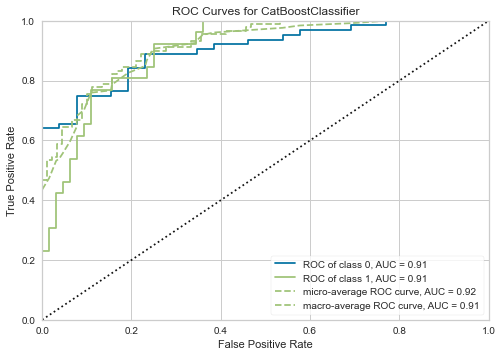

In [76]:
pc.plot_model(Tuned_Cat_Op)

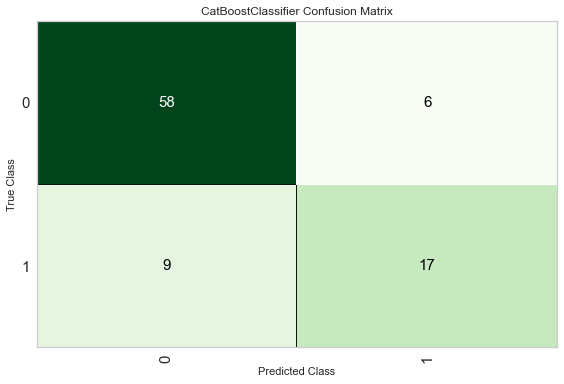

In [85]:
pc.plot_model(Tuned_Cat_Op, plot = 'confusion_matrix')

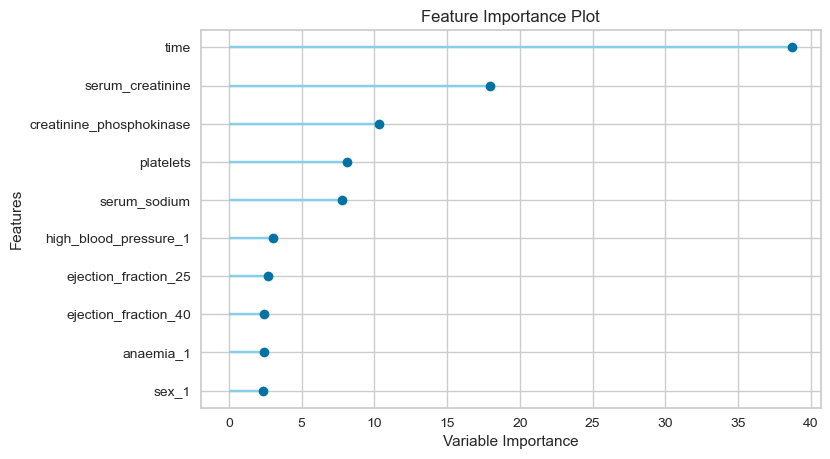

In [86]:
pc.plot_model(Tuned_Cat_Op, plot = 'feature')

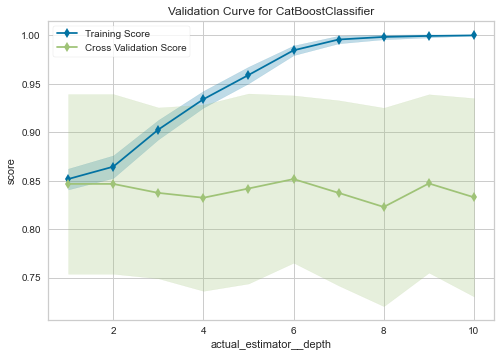

In [87]:
pc.plot_model(Tuned_Cat_Op, plot = 'vc')

In [94]:
# Optimize thresold for trained model
pc.optimize_threshold(Tuned_Cat_Op, true_positive =58, false_positive = 6, true_negative = 17, false_negative = 9)

Optimized Probability Threshold: 0.11370000000000001 | Optimized Cost Function: 2343


0.11370000000000001

  Using cached slicer-0.0.3-py3-none-any.whl (11 kB)


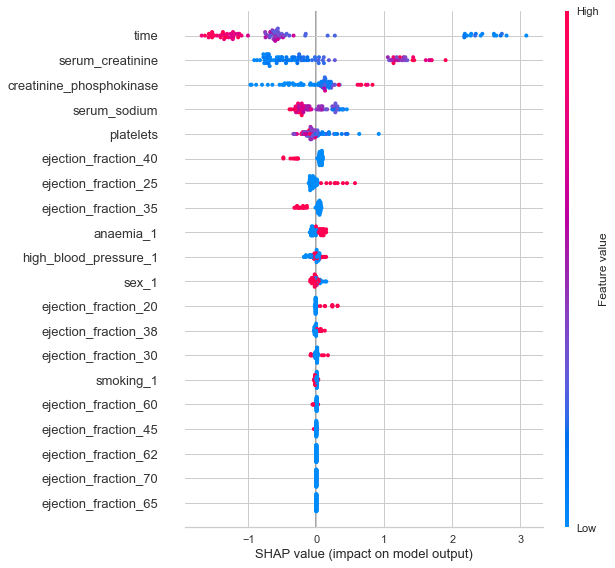

In [97]:
!pip install shap
pc.interpret_model(Tuned_Cat_Op)

## Interpretation using SHAP values shows very similar findings with feautre importance plot

In [98]:
final_Cat_model = pc.finalize_model(Tuned_Cat_Op)

In [99]:
Prediction = pc.predict_model(final_Cat_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9889,1.0000,0.9615,1.0000,0.9804,0.9726,0.9730


### CatBooster classifier showed to be accurate at 0.98%
+ Time being the most impactful attribute
+ Along side serum_cretanine
+ creatinine phosphokinase
+ serum sodium 
+ platelets